# Examen Final

In [44]:
# Paqueterías
library(tidyverse)
library(ggplot2)
library(caret)

## Inferencia gráfica

Para este ejercicio utilizaremos los datos de un estudio longitudinal de Singer y Willet 2003 (wages). En este estudio se visitó a hombres en edad laboral que habitan en EUA, se visitó a cada sujeto entre 1 y 13 veces, en cada visita se registraron las siguientes mediciones:

```
id: identificador de sujeto  
hgc: grado de educación más alto completado  
lnw : logaritmo natural del salario  
exper: años de experiencia laboral
```

El objetivo del ejercicio es estudiar la relación entre salario y experiencia laboral por raza para aquellos sujetos cuyo año máximo de estudios completados es igual a 9, 10 u 11, estos son sujetos que abandonaron sus estudios durante preparatoria. Seguiremos un enfoque no paramétrico que consiste en ajustar un suavizador para cada grupo de raza (blanco, hispano o negro) como se muestra en la siguiente gráfica.

In [45]:
load("wages_t.RData")

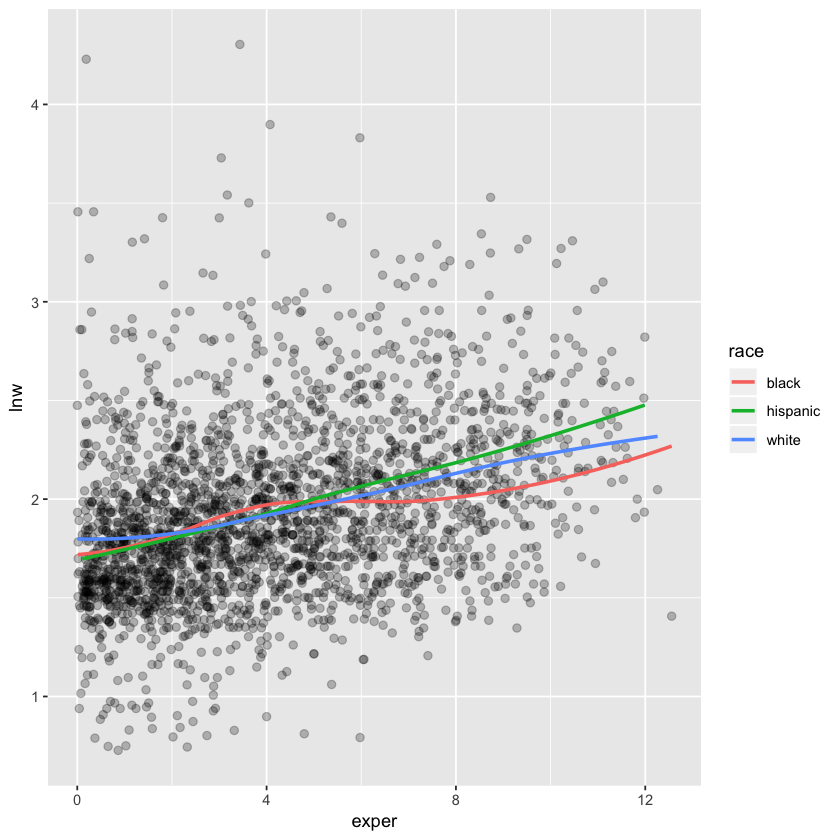

In [46]:
ggplot(wages_t, aes(x = exper, y = lnw)) +
  geom_point(alpha = 0.25, size = 2) + 
  geom_smooth(aes(group = race, color = race), method = "loess", se = FALSE)

Utilizaremos una prueba de hipótesis gráfica para determinar si existe una diferencia significativa entre las curvas.

1 .- Preparación de los datos.
Se llevó a cabo la siguiente preparación de los datos, el archivo ```wages_t.RData``` ya incluye la preparación.

- Selecciona los sujetos con grado de estudios completado igual a 9, 10 u 11.
- Elimina las observaciones donde el logaritmo del salario (lnw) es mayor a 3.5.
- Crea una variable correspondiente a raza, un sujeto es de raza hispana si la variable hispanic toma el valor 1, de raza negra si la variable black toma el valor 1 y de raza blanca si las dos anteriores son cero.
- Crea un subconjunto de la base de datos de tal manera que tengas el mismo número de sujetos distintos en cada grupo de raza. Nota: habrá el mismo número de sujetos en cada grupo pero el número de observaciones puede diferir pues los sujetos fueron visitados un número distinto de veces.

In [77]:
datos <- wages_t %>% filter(exper>=9 & lnw<=3.5)
dummies <- dummyVars("~.", data=datos)
datos_encod <- data.frame(predict(dummies, newdata = datos)) %>% 
        select('id', 'lnw', 'raceblack', 'racehispanic','exper')

Se cuentan los casos raciales para estructurar una muestra con el mismo número de elementos.

In [95]:
datos %>% group_by(race) %>% summarise(n())

#Casos únicos 'black'
print(paste("Casos únicos 'black': ", datos %>% filter(race=='black') %>% select(id) %>% count()))

race,n()
black,28
hispanic,75
white,65


[1] "Casos únicos 'black':  28"


'black' es la raza con menor número de elementos, por lo que se hará una muestra con el mismo número de 'hispanic' y 'white'

#Muestra con 28 'hispanic' y '28 white'
hisp_28 <- datos %>% filter(race=='hispanic') %>% select(id) %>% unique()
hisp_28 <- hisp_28$id[1:28]
white_28 <- datos %>% filter(race=='white') %>% select(id) %>% unique()
white_28 <- white_28$id[1:28]
black_28 <- datos %>% filter(race=='white') %>% select(id) %>% unique()
black_28 <- black_28$id[1:28]
id_sub <- c(hisp_28, white_28, black_28)

sub <- datos %>% filter(id %in% id_sub) %>% arrange(id)
dummies <- dummyVars("~.", data=sub)
sub_encod <- data.frame(predict(dummies, newdata = datos)) %>% 
        select('id', 'lnw', 'raceblack', 'racehispanic','exper')
print('Las dimensiones de la sub_base con nevas codificaciones de raza serán:  ')
print('Observaciones | variables')
print(sub_encodd %>% dim())

sub_encod %>% head()

2.- Prueba de hipótesis visual

El escenario nulo consiste en que no hay diferencia entre las razas. Para generar los datos nulos, la etiqueta de raza de cada sujeto se permuta, es decir, se reasigna la raza de cada sujeto de manera aleatoria (para todas las mediciones de un sujeto dado se reasigna una misma raza). Genera 10 conjuntos de datos nulos y para cada uno ajusta una curva loess siguiendo la instrucción de la gráfica de arriba. Crea una gráfica de paneles donde incluyas los 10 conjuntos nulos y los datos reales, estos últimos estarán escondidos de manera aleatoria.